In [57]:
from gensim.models import Word2Vec, FastText
from sklearn.manifold import TSNE
from note_reader import get_notes
import matplotlib.pyplot as plt
import numpy as np
import glob

In [58]:
plt.rcParams["font.family"] = ["Times"]
UNK_TAG = "<UNK>"

In [3]:
file_list = glob.glob("data/txt/*.txt")

In [4]:
docs, counts = get_notes(file_list, as_pitch_classes=True, return_counts=True)

In [5]:
pitches_sorted = counts.most_common()
pitches, pitch_counts = zip(*pitches_sorted)

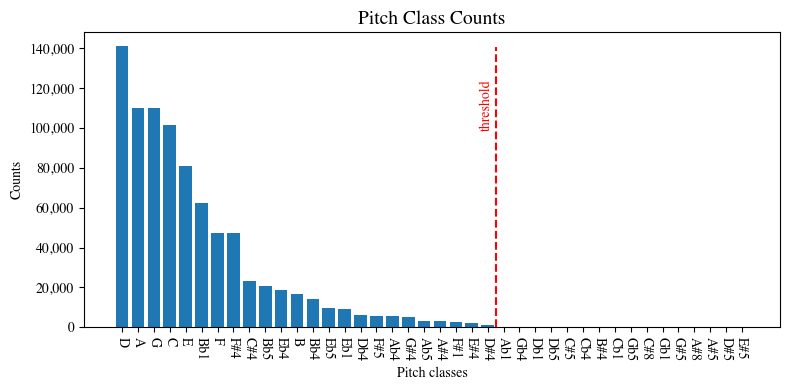

In [6]:
fig = plt.figure(figsize=(8, 4))
plt.title("Pitch Class Counts", fontdict={"fontsize": 14})
plt.xlabel("Pitch classes")
plt.xticks(rotation=-90)
plt.ylabel("Counts")
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.bar(pitches, pitch_counts)
plt.tight_layout()
plt.axvline(x=23.5, ymax=0.95, color="r", linestyle="--")
plt.text(22.5, 100000, "threshold", rotation=90, color="r")
plt.show()

In [7]:
common_pitches = [x[0] for x in counts.most_common(24)]
common_docs = []
for doc in docs:
    common_doc = [x if x in common_pitches else UNK_TAG for x in doc]
    common_docs.append(common_doc)

# Word2Vec model


In [8]:
w2v_model = Word2Vec(sentences=common_docs,
                     vector_size=20, epochs=10, window=4)
w2v_model.wv.most_similar(positive=["C", "A"], negative=["G"], topn=3)  # D

[('Bb1', 0.3025728166103363),
 ('D', 0.28085964918136597),
 ('E', 0.20509417355060577)]

In [9]:
w2v_model.wv.most_similar("G")

[('F#4', 0.4212058484554291),
 ('Bb5', 0.2001620978116989),
 ('Eb5', 0.18839700520038605),
 ('Eb4', 0.1767275482416153),
 ('Ab4', 0.15915179252624512),
 ('Eb1', 0.12474315613508224),
 ('E#4', 0.05424543470144272),
 ('Ab5', 0.002028092509135604),
 ('C#4', -0.014787702821195126),
 ('A', -0.04122960567474365)]

In [10]:
w2v_model.wv.similarity("G", "A")

-0.04122959

# Find analogies

`model.most_similar(positive=["woman", "king"], negative=["man"], topn = 1) --> "queen"`


In [11]:
w2v_model.wv.most_similar(positive=["C", "A"], negative=["G"])  # D

[('Bb1', 0.3025728166103363),
 ('D', 0.28085964918136597),
 ('E', 0.20509417355060577),
 ('Db4', 0.17251740396022797),
 ('A#4', 0.1536262184381485),
 ('F#1', 0.058404382318258286),
 ('B', 0.05020546913146973),
 ('F#5', 0.04194292798638344),
 ('G#4', 0.03908655047416687),
 ('Bb5', -0.05747108906507492)]

# FastText model


In [12]:
ft_model = FastText(sentences=common_docs, vector_size=10, epochs=20, window=5)
ft_model.wv.most_similar(positive=["C", "A"], negative=["G"])  # D

[('D', 0.5423399209976196),
 ('Bb1', 0.46136024594306946),
 ('B', 0.41858726739883423),
 ('Db4', 0.3130931556224823),
 ('E', 0.2681616246700287),
 ('G#4', 0.25599679350852966),
 ('A#4', 0.10863102972507477),
 ('F#1', 0.06806745380163193),
 ('Eb5', 0.04122724011540413),
 ('D#4', -0.049135975539684296)]

In [13]:
ft_model.wv.most_similar("G")

[('F#4', 0.7132247090339661),
 ('A', 0.3710966110229492),
 ('Ab4', 0.3362799882888794),
 ('Bb5', 0.31971192359924316),
 ('Eb4', 0.2781490385532379),
 ('E#4', 0.2165660560131073),
 ('Bb4', 0.1488109529018402),
 ('F#1', 0.10673017799854279),
 ('Ab5', 0.06901639699935913),
 ('Eb5', 0.038355108350515366)]

In [14]:
ft_model.wv["G"]

array([-1.0131366 ,  2.3324313 , -0.16943909,  0.96619445,  0.45969436,
        2.7423954 , -2.5022283 ,  1.4658468 ,  0.3218776 , -1.8395834 ],
      dtype=float32)

In [16]:
np.rad2deg(np.arccos(ft_model.wv.similarity("G", "F#4")))

44.5021

In [18]:
ft_model.wv.most_similar(positive=["C", "A"], negative=["G"], topn=3)  # D

[('D', 0.5423399209976196),
 ('Bb1', 0.46136024594306946),
 ('B', 0.41858726739883423)]

In [25]:
ft_model.wv.most_similar(positive=["E", "G"], negative=["A"], topn=3)  # D

[('Ab4', 0.5095431208610535),
 ('F', 0.4590824544429779),
 ('C#4', 0.36908459663391113)]

In [27]:
ft_model.wv.vectors.shape

(25, 10)

In [32]:
ft_model.wv.key_to_index

{'D': 0,
 'A': 1,
 'G': 2,
 'C': 3,
 'E': 4,
 'Bb1': 5,
 'F': 6,
 'F#4': 7,
 'C#4': 8,
 'Bb5': 9,
 'Eb4': 10,
 'B': 11,
 'Bb4': 12,
 'Eb5': 13,
 'Eb1': 14,
 'Db4': 15,
 'F#5': 16,
 'Ab4': 17,
 'G#4': 18,
 'Ab5': 19,
 'A#4': 20,
 'F#1': 21,
 'E#4': 22,
 'D#4': 23,
 '<UNK>': 24}

In [37]:
# from: https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python

def unit_vector(vector):
    return vector / np.linalg.norm(vector)


def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.rad2deg(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

In [46]:
for current in ft_model.wv.key_to_index:
    print(f"*** {current} ***")
    for pitch in ft_model.wv.key_to_index:
        print(
            f"--> {pitch}: {round(angle_between(ft_model.wv[current], ft_model.wv[pitch]), 2)}")

*** D ***
--> D: 0.02
--> A: 90.51
--> G: 108.38
--> C: 44.67
--> E: 77.65
--> Bb1: 72.93
--> F: 78.97
--> F#4: 101.52
--> C#4: 83.77
--> Bb5: 102.47
--> Eb4: 81.39
--> B: 91.92
--> Bb4: 97.74
--> Eb5: 85.92
--> Eb1: 102.22
--> Db4: 101.14
--> F#5: 101.39
--> Ab4: 87.41
--> G#4: 110.58
--> Ab5: 105.32
--> A#4: 81.47
--> F#1: 92.34
--> E#4: 132.5
--> D#4: 101.23
--> <UNK>: 127.28
*** A ***
--> D: 90.51
--> A: 0.0
--> G: 68.22
--> C: 75.08
--> E: 75.4
--> Bb1: 86.86
--> F: 118.54
--> F#4: 75.59
--> C#4: 96.05
--> Bb5: 78.64
--> Eb4: 99.65
--> B: 84.83
--> Bb4: 87.12
--> Eb5: 89.13
--> Eb1: 119.89
--> Db4: 79.64
--> F#5: 107.29
--> Ab4: 116.22
--> G#4: 71.2
--> Ab5: 122.8
--> A#4: 108.53
--> F#1: 67.2
--> E#4: 85.51
--> D#4: 121.15
--> <UNK>: 125.09
*** G ***
--> D: 108.38
--> A: 68.22
--> G: 0.0
--> C: 111.93
--> E: 99.94
--> Bb1: 107.61
--> F: 106.21
--> F#4: 44.5
--> C#4: 90.61
--> Bb5: 71.35
--> Eb4: 73.85
--> B: 120.79
--> Bb4: 81.44
--> Eb5: 87.8
--> Eb1: 92.4
--> Db4: 96.63
--> F#5

In [62]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, perplexity=15)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

x_vals, y_vals, labels = reduce_dimensions(ft_model)

/Users/ihp/opt/miniconda3/envs/tfnew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ihp/opt/miniconda3/envs/tfnew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


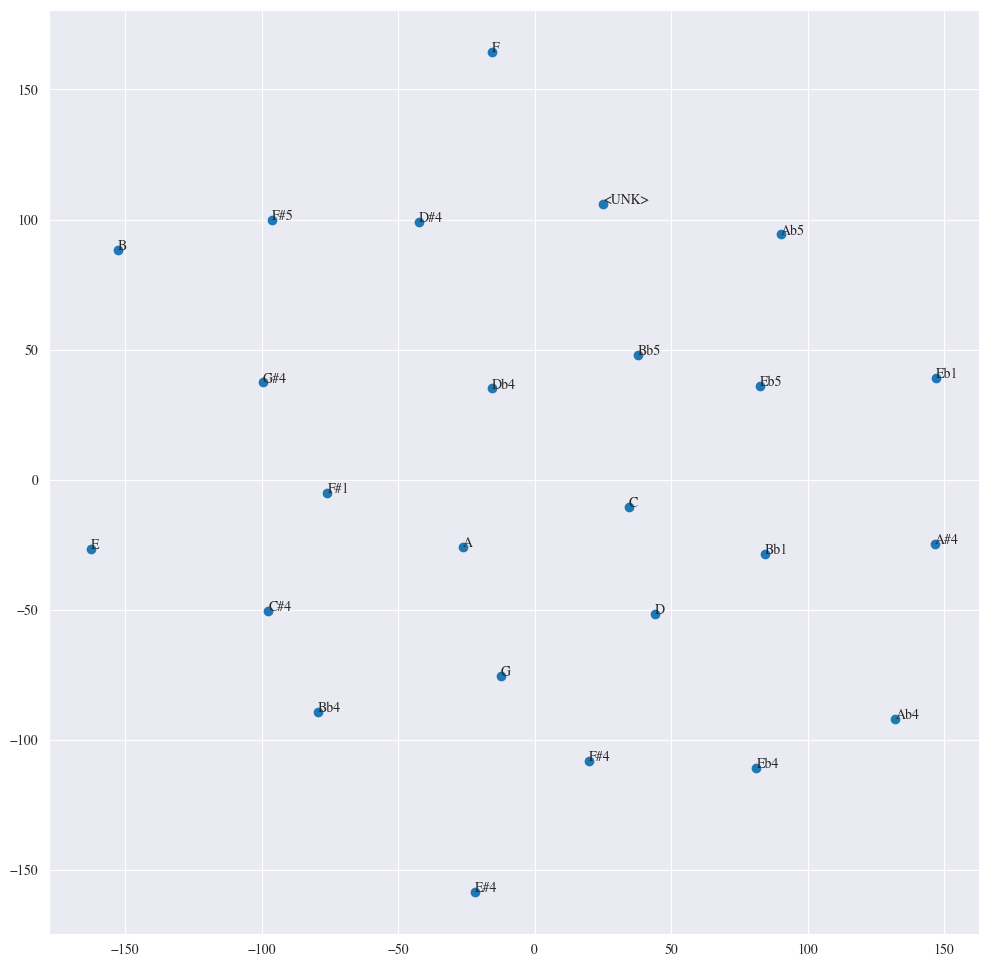

In [63]:
plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

for i in range(len(labels)):
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))